In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd  # You can use this or any other SVD library

# Load the dataset
df = pd.read_csv("fashion_mnist1.csv")

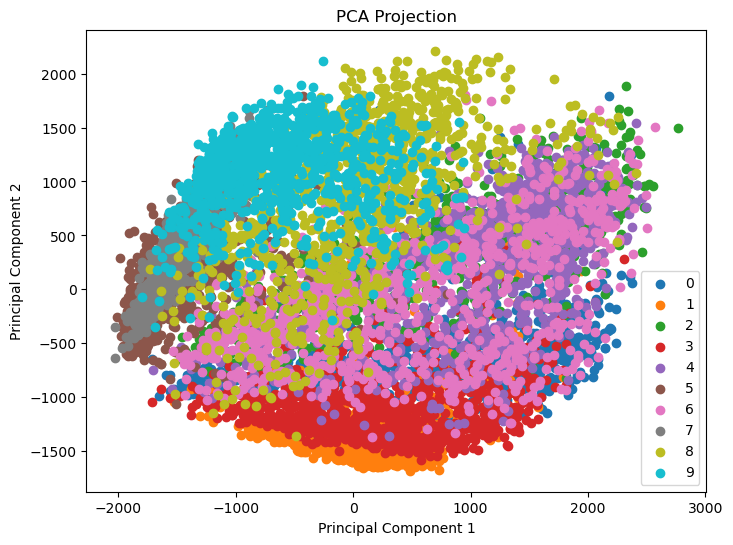

In [4]:

X = df.drop(columns=['label']).values
y = df['label'].values

# Center the data
X_centered = X - np.mean(X, axis=0)

# SVD
U, S, VT = svd(X_centered)

# Principal components
PC1 = U[:, 0]
PC2 = U[:, 1]

# Project data onto principal components
X_projected = X_centered @ VT.T[:, :2]

# Plotting
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X_projected[y == label, 0], X_projected[y == label, 1], label=str(label))
plt.legend()
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection")
plt.show()


# Created/Modified files during execution:
for file_name in []:
   print(file_name)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("fashion_mnist1.csv")
X = df.drop(columns=['label']).values
y = df['label'].values

def Hbeta(D=np.array([]), beta=1.0):
  """Compute the perplexity and the P-row for a specific value of the
  precision of a Gaussian distribution."""

  # Compute P-row and corresponding perplexity
  P = np.exp(-D * beta)
  sumP = np.sum(P)
  H = np.log(sumP) + beta * np.sum(D * P) / sumP
  P = P / sumP
  return H, P


def x2p(X=np.array([]), tol=1e-5, perplexity=30.0):
  """Performs a binary search to get P-values in such a way that each
  conditional Gaussian has the same perplexity."""

  # Initialize some variables
  print("Computing pairwise distances...")
  (n, d) = X.shape
  sum_X = np.sum(np.square(X), 1)
  D = np.add(np.add(-2 * np.dot(X, X.T), sum_X).T, sum_X)
  P = np.zeros((n, n))
  beta = np.ones((n, 1))
  logU = np.log(perplexity)

  # Loop over all datapoints
  for i in range(n):

      # Print progress
      if i % 500 == 0:
          print("Computing P-values for point %d of %d..." % (i, n))

      # Compute the Gaussian kernel and entropy for the current precision
      betamin = -np.inf
      betamax = np.inf
      Di = D[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))]
      (H, thisP) = Hbeta(Di, beta[i])

      # Evaluate whether the perplexity is